In [1]:
import matplotlib.pyplot as plt
import pycaret as pc
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [4]:
mnist= keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

# EDA

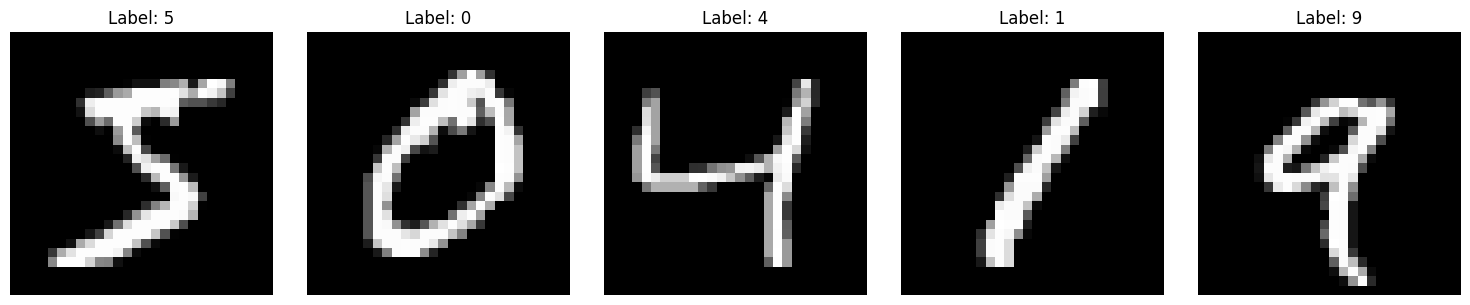

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

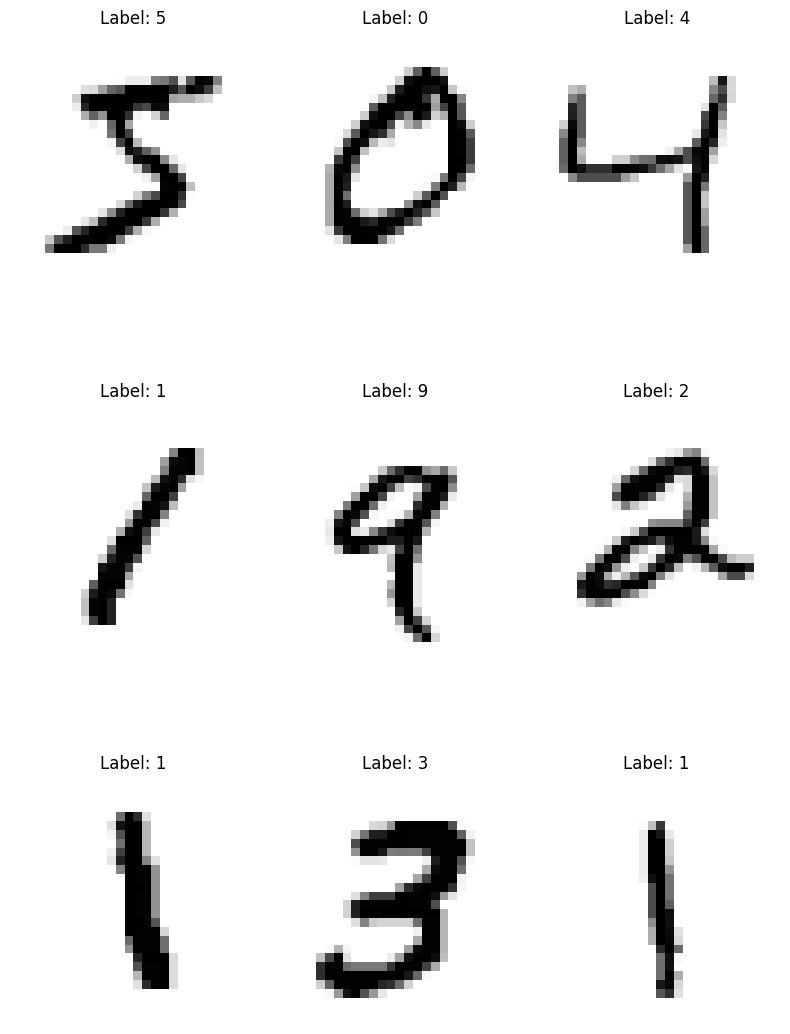

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(8, 12))
for idx, ax in enumerate(axes.flat):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.set_title(f"Label: {y_train[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# NORMALIZATION

In [19]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# NORMALIZATION

In [20]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

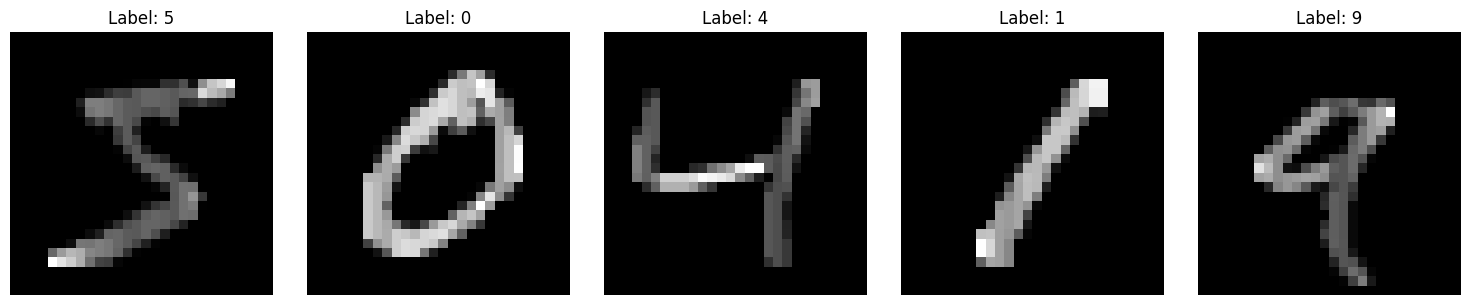

In [21]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [24]:
print(x_train[800])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# RESIZING SHAPE

In [26]:
import numpy as np

In [27]:
IMG_SIZE = 28
x_trainnr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testnr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [29]:
print(x_trainnr.shape)

(60000, 28, 28, 1)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D

In [36]:
#### Creating a neural network now
model = Sequential()

#### First Convolution layer & 1 2 3 = (50000,28,28,1) | 28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainnr.shape[1:])) ## only for first convolution layer to mention input layer size
model.add(Activation("relu")) ## activation function to make it non-linear, #0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling single maximum value of 2x2,

#### 2nd Convolution layer  26-3+1= 24*24
model.add(Conv2D(64, (3,3))) ## 2nd Convolution layer
model.add(Activation("relu")) ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

### 3rd Convolution layer
model.add(Conv2D(64, (3,3))) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Fully (connected) layer # 1  24x24= 384
model.add(Flatten()) ## before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

### Fully (connected) layer # 2  24x24= 384
model.add(Dense(32))
model.add(Activation("relu"))

### Last Filly Connected Layer
model.add(Dense(10))  # 10 classes for digits 0-9
model.add(Activation("softmax"))  # softmax for multi-class classification
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(
    x_trainnr, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_testnr, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8154 - loss: 0.5641 - val_accuracy: 0.9706 - val_loss: 0.1052
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9703 - loss: 0.0965 - val_accuracy: 0.9806 - val_loss: 0.0671
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9788 - loss: 0.0687 - val_accuracy: 0.9813 - val_loss: 0.0660
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9830 - loss: 0.0532 - val_accuracy: 0.9833 - val_loss: 0.0612
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9881 - loss: 0.0380 - val_accuracy: 0.9860 - val_loss: 0.0478


In [39]:
test_loss, test_acc = model.evaluate(x_testnr, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 5ms/step - accuracy: 0.9860 - loss: 0.0478
Test accuracy: 0.9860
Test loss: 0.0478


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


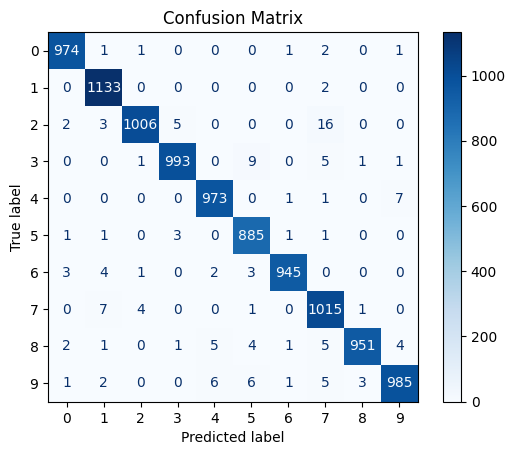

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred = model.predict(x_testnr)
y_pred_classes = y_pred.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [54]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Decision Tree predictions
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

Accuracy:  0.9860
Precision: 0.9861
Recall:    0.9860
F1 Score:  0.9860

Classification Report:
              precision    recall  f1-score   support

           0     0.9908    0.9939    0.9924       980
           1     0.9835    0.9982    0.9908      1135
           2     0.9931    0.9748    0.9839      1032
           3     0.9910    0.9832    0.9871      1010
           4     0.9868    0.9908    0.9888       982
           5     0.9747    0.9922    0.9833       892
           6     0.9947    0.9864    0.9906       958
           7     0.9648    0.9874    0.9760      1028
           8     0.9948    0.9764    0.9855       974
           9     0.9870    0.9762    0.9816      1009

    accuracy                         0.9860     10000
   macro avg     0.9861    0.9859    0.9860     10000
weighted avg     0.9861    0.9860    0.9860     10000



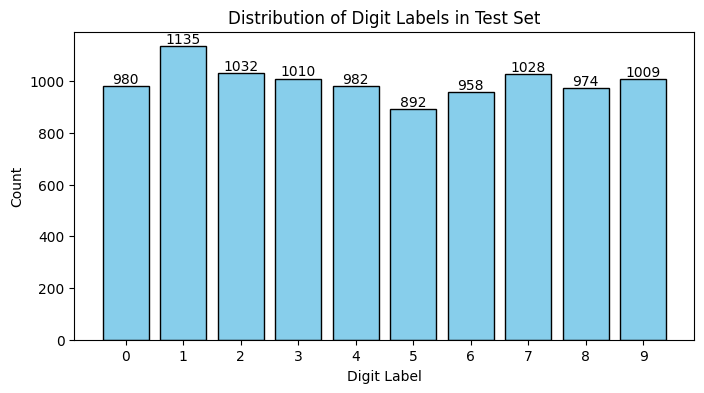

In [42]:
plt.figure(figsize=(8, 4))
counts = np.bincount(y_test)
bars = plt.bar(range(10), counts, color='skyblue', edgecolor='black')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.title('Distribution of Digit Labels in Test Set')
plt.xticks(range(10))

# Annotate each bar with the count value
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10)

plt.show()

In [45]:
# Predict the label for the second test image (index 1)
y_pred_single = model.predict(x_testnr[1:2])
predicted_class = y_pred_single.argmax(axis=1)[0]
print(f"Predicted class for the second test image: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class for the second test image: 2


In [46]:
y_test[1]

2

# DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Flatten the images for Decision Tree input
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [48]:
x_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [50]:
dt_model.fit(x_train_flat, y_train)

DecisionTreeClassifier(random_state=42)

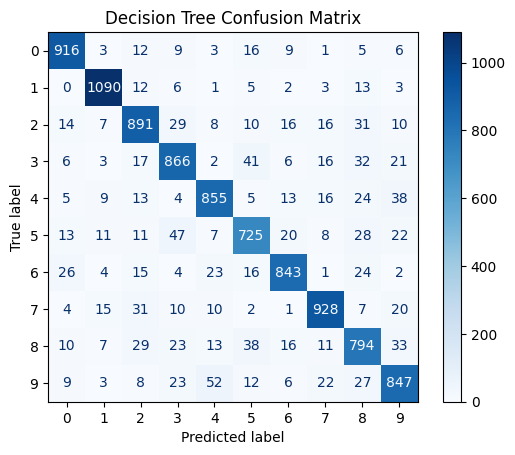

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set using the Decision Tree model
y_pred_dt = dt_model.predict(x_test_flat)

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [52]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Decision Tree predictions
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, digits=4))

Accuracy:  0.8755
Precision: 0.8754
Recall:    0.8755
F1 Score:  0.8754

Classification Report:
              precision    recall  f1-score   support

           0     0.9133    0.9347    0.9239       980
           1     0.9462    0.9604    0.9532      1135
           2     0.8576    0.8634    0.8605      1032
           3     0.8482    0.8574    0.8528      1010
           4     0.8778    0.8707    0.8742       982
           5     0.8333    0.8128    0.8229       892
           6     0.9045    0.8800    0.8921       958
           7     0.9080    0.9027    0.9054      1028
           8     0.8061    0.8152    0.8106       974
           9     0.8453    0.8394    0.8424      1009

    accuracy                         0.8755     10000
   macro avg     0.8740    0.8737    0.8738     10000
weighted avg     0.8754    0.8755    0.8754     10000

